In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

In [3]:
train = datasets.MNIST('/kaggle/working/', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))


test = datasets.MNIST('/kaggle/working/', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

100%|██████████| 9.91M/9.91M [00:00<00:00, 57.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.75MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.3MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.40MB/s]


In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [5]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
x,y = data[0][0], data[1][0]
y

tensor(6)

In [7]:
import matplotlib.pyplot as plt
print(data[0][0].shape)

torch.Size([1, 28, 28])


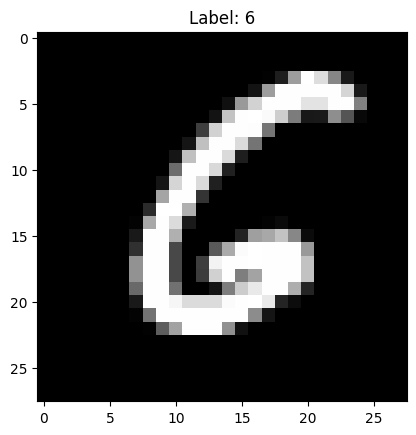

In [8]:
plt.imshow(data[0][0].squeeze(), cmap="gray")
plt.title(f"Label: {data[1][0]}")
plt.show()

In [9]:
# TO SEE IF THE DATASET IS BALANCED

total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainset:
    Xs,ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print("counter dictionary",counter_dict)
for i in counter_dict:
    print(f'{i}: {counter_dict[i]/total*100}')

counter dictionary {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


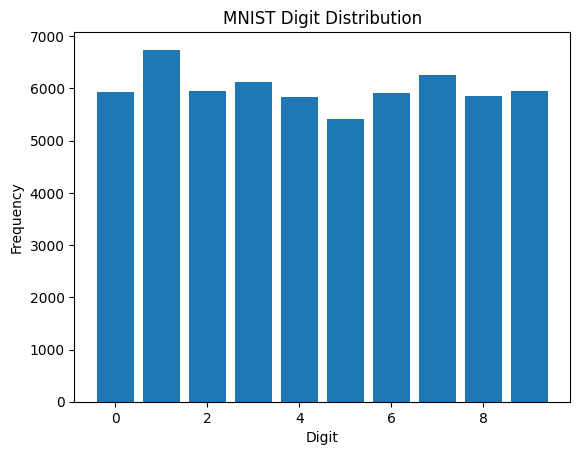

In [10]:
# to visualize the balance in dataset

plt.bar(counter_dict.keys(), counter_dict.values())
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("MNIST Digit Distribution")
plt.show()

In [11]:
### BUILDING THE NEURAL NETWORK
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = self.fc4(X)
        return F.log_softmax(X, dim = 1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)


In [12]:
X = torch.rand(28,28)
X = X.view(-1,28*28)
output = net(X)
output

tensor([[-2.3650, -2.2164, -2.2239, -2.3946, -2.3406, -2.2634, -2.3006, -2.3439,
         -2.2716, -2.3219]], grad_fn=<LogSoftmaxBackward0>)

In [13]:
# training the model
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr = 1e-3)
EPOCHS = 3
for epoch in range(EPOCHS):
    for data in trainset:
        x,y = data
        net.zero_grad()
        output = net(x.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()

    print(loss)

tensor(0.0120, grad_fn=<NllLossBackward0>)
tensor(0.0657, grad_fn=<NllLossBackward0>)
tensor(0.0457, grad_fn=<NllLossBackward0>)
